In [1]:
!pip install seaborn

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
data =sns.load_dataset("titanic")

In [4]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df=pd.DataFrame(data)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          778 non-null    object  
 1   age          778 non-null    float64 
 2   sibsp        778 non-null    int64   
 3   parch        778 non-null    int64   
 4   fare         778 non-null    float64 
 5   class        778 non-null    category
 6   embark_town  778 non-null    object  
 7   alive        778 non-null    object  
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 49.5+ KB


In [48]:
df.isnull().sum()*100/len(df)

sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
class          0.0
embark_town    0.0
alive          0.0
dtype: float64

In [54]:
df.corr()

,age,sibsp,parch,fare
age,1.000000,-0.279259,-0.186340,0.087484
sibsp,-0.279259,1.000000,0.380174,0.135490
parch,-0.186340,0.380174,1.000000,0.192411
fare,0.087484,0.135490,0.192411,1.000000


# Data cleaning

 Droping the duplicate rows and keeping the first row

In [36]:
df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.shape

(784, 15)

Droping unwanted/irrelevent columns from our dataset

In [47]:
df=df.drop(['survived','pclass','who','embarked','adult_male','alone'],axis=1)

KeyError: "['survived', 'pclass', 'who', 'embarked', 'adult_male', 'alone'] not found in axis"

# Filling the null values with mode and mean

In [34]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode())

In [29]:
df['age']=df['age'].fillna(df['age'].mean())

# Droping the rows having null values if null values are less than 2%

In [40]:
df.dropna(inplace=True)

In [50]:
df

,sex,age,sibsp,parch,fare,class,embark_town,alive
0,male,22.000000,1,0,7.2500,Third,Southampton,no
1,female,38.000000,1,0,71.2833,First,Cherbourg,yes
2,female,26.000000,0,0,7.9250,Third,Southampton,yes
3,female,35.000000,1,0,53.1000,First,Southampton,yes
4,male,35.000000,0,0,8.0500,Third,Southampton,no
...,...,...,...,...,...,...,...,...
885,female,39.000000,0,5,29.1250,Third,Queenstown,no
887,female,19.000000,0,0,30.0000,First,Southampton,yes
888,female,29.869351,1,2,23.4500,Third,Southampton,no
889,male,26.000000,0,0,30.0000,First,Cherbourg,yes


# Exploratory data analysis

In [52]:
df.groupby(['sex','alive'])['alive'].count()

sex     alive
female  no        76
        yes      214
male    no       382
        yes      106
Name: alive, dtype: int64

In [53]:
df.groupby(['class','alive'])['alive'].count()

class   alive
First   no        77
        yes      133
Second  no        81
        yes       83
Third   no       300
        yes      104
Name: alive, dtype: int64

[Text(0.5, 1.0, 'Survival')]

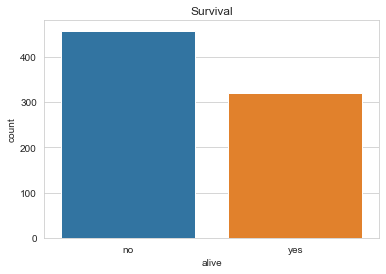

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='alive',data=df).set(title='Survival')

[Text(0.5, 1.0, 'Survival /Sex')]

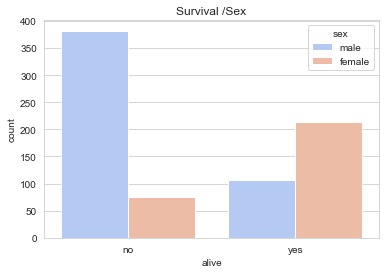

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='alive',hue='sex',data=df,palette='coolwarm').set(title='Survival /Sex')

[Text(0.5, 1.0, 'Survival/class')]

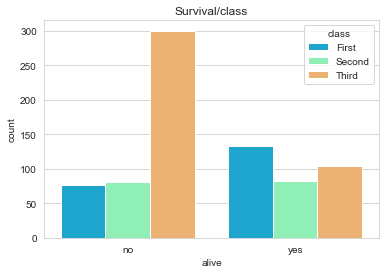

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='alive',hue='class',data=df,palette='rainbow').set(title='Survival/class')

<AxesSubplot:xlabel='age', ylabel='Density'>

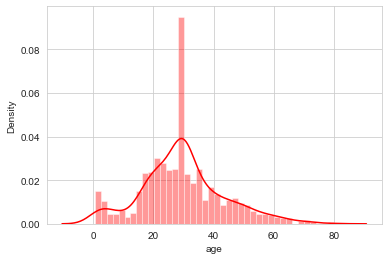

In [63]:
sns.distplot(df['age'],bins=40,color='red')

# Findings
1-Maximum people who lost there live were male.
2-People from third class lost their life most. 